## Gene Expression RNA-Seq Classification 

This dataset contains two data files. One file contains the sample numbers and names. The othe file contains our RNA-Seq data set that shows the gene expression levels of ~20,000 genes for each samples. 

From this data set, I will explore different classification models and see which model can accurately predict tumors based on certain gene expression levels. 

This dataset only contains information on these tumors:
- BRCA
- KIRC
- COAD
- LUAD 
- PRAD

**Pipeline:**
- Clean up our data to remove any significant genes expression, such as columns containing all zero values
- Normalize our data to be comparable with each other
- Create a clustering model to explore our data in depth 
- Test out multiple classification models with different test groups and numbers and compare their accuracy

### Load Data

In [1]:
# Import packages

# Initial Packages
import pandas as pd
from functions import *
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# Categorical to Numeric
from sklearn.preprocessing import LabelEncoder

# Normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Clustering Model 



# Classification Model 

In [2]:
# Files 
data_file = "/Users/kim/Desktop/repos/RNA-Seq_GeneExpression_Model/data.csv"
labels_file = "/Users/kim/Desktop/repos/RNA-Seq_GeneExpression_Model/labels.csv"

# Load data
data_df = pd.read_csv(data_file)
labels_df = pd.read_csv(labels_file)

In [3]:
# Check out our data
print(data_df.head())
print(labels_df.head())

  Unnamed: 0  gene_0    gene_1    gene_2    gene_3     gene_4  gene_5  \
0   sample_0     0.0  2.017209  3.265527  5.478487  10.431999     0.0   
1   sample_1     0.0  0.592732  1.588421  7.586157   9.623011     0.0   
2   sample_2     0.0  3.511759  4.327199  6.881787   9.870730     0.0   
3   sample_3     0.0  3.663618  4.507649  6.659068  10.196184     0.0   
4   sample_4     0.0  2.655741  2.821547  6.539454   9.738265     0.0   

     gene_6    gene_7  gene_8  ...  gene_20521  gene_20522  gene_20523  \
0  7.175175  0.591871     0.0  ...    4.926711    8.210257    9.723516   
1  6.816049  0.000000     0.0  ...    4.593372    7.323865    9.740931   
2  6.972130  0.452595     0.0  ...    5.125213    8.127123   10.908640   
3  7.843375  0.434882     0.0  ...    6.076566    8.792959   10.141520   
4  6.566967  0.360982     0.0  ...    5.996032    8.891425   10.373790   

   gene_20524  gene_20525  gene_20526  gene_20527  gene_20528  gene_20529  \
0    7.220030    9.119813   12.003135  

In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Columns: 20532 entries, Unnamed: 0 to gene_20530
dtypes: float64(20531), object(1)
memory usage: 125.5+ MB


In [5]:
# Check if there's any null values in both of our dataframe
print_columns_with_null(data_df)
print_columns_with_null(labels_df)

No columns have null values.
No columns have null values.


In [6]:
# Merge the two dataframes together
merged_df = pd.merge(data_df, labels_df, on = 'Unnamed: 0', how = 'inner')
merged_df

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Class
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000,PRAD
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000,LUAD
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000,PRAD
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000,PRAD
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000,BRCA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,sample_796,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,...,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000,BRCA
797,sample_797,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,...,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000,LUAD
798,sample_798,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,...,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693,COAD
799,sample_799,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,...,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000,PRAD


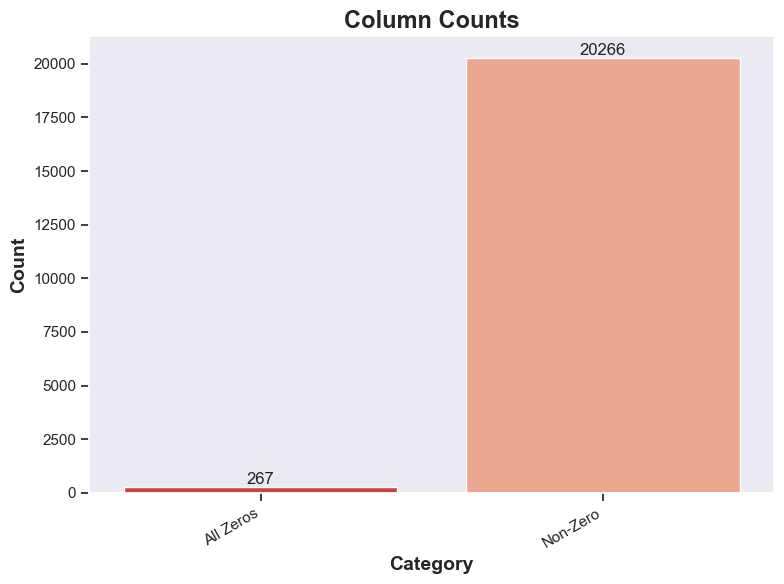

In [7]:
# From seeing bits of our data, we see some columns completely have all 0 values. Let's check how many columns have all zero values and columns with atleast one non-zero values

# Print out the count of columns with all zero values and atleast one non-zero values
Columns_counts_df = count_columns_with_zeros(merged_df)

# Visualize using a bar plot

# Setting up figure settings
sns.set(style="dark", font="sans serif")
fig_dims = (8, 6)

# Create the bar graph
f, (ax) = plt.subplots(figsize=fig_dims)
ax = sns.barplot(x = 'Category', y = 'Count',
                data = Columns_counts_df,
                palette='Reds_r',
                ax=ax)

# Set up labels
plt.xlabel('Category', fontsize=14, loc= 'center', fontweight = 'bold');
plt.ylabel('Count', fontsize=14, loc= 'center', fontweight = 'bold');
plt.title('Column Counts', fontsize=17, fontweight = 'bold')

# Add ticks to both x and y axis
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

# Put bar labels on each bars
for container in ax.containers:
    ax.bar_label(container, size = 12)

# Format graph 
f.autofmt_xdate()
plt.tight_layout()
plt.show()

In [8]:
# Drop all columns with all zero values

updated_df = remove_cols_with_all_zero(merged_df)
updated_df.head()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_6,gene_7,gene_8,gene_9,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Class
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,7.175175,0.591871,0.0,0.0,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0,PRAD
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,6.816049,0.000000,0.0,0.0,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0,LUAD
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,6.972130,0.452595,0.0,0.0,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0,PRAD
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,7.843375,0.434882,0.0,0.0,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0,PRAD
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,6.566967,0.360982,0.0,0.0,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0,BRCA


From the printed dataframe, there are some columns with 0 zeros and I want to make sure that there are actual non-zero values in the columns. So, I will do a test with column 2 ('gene_0') to see if my remove_cols_with_all_zero function worked. 


In [9]:
# Assign the second column to a variable 
second_column = updated_df['gene_0']

# Check if there are any non-zero values in the second column
any_non_zero_values = (second_column != 0).any()

# Print the result
print(f"Are there any n  on-zero values in the second column? {any_non_zero_values}")

Are there any n  on-zero values in the second column? True


In [10]:
# Add all the non-zero values into a list
non_zero_values = second_column[second_column != 0].tolist()

# Print the list of non-zero values
print("Non-zero values in the second column:")
print(non_zero_values)

Non-zero values in the second column:
[0.341758085079, 0.631523406479, 1.48233202075, 0.66775590841, 0.544089666549, 0.81893234401, 0.412944073369, 0.531867995606, 0.328721595402, 0.34164424053, 0.565889584403, 0.698840770207, 0.624709202229, 0.588900487699, 1.21915302835, 0.487383443037, 0.337539842197, 0.547745938687, 1.24110797493, 0.873340751556, 0.757450016231, 0.646439185614, 0.566669050913, 0.542010355537, 0.844064214792, 0.553163870509, 0.450379880071, 0.283921772308, 0.664118707339, 0.325156117742, 0.363339311629, 0.807767061766, 0.408603179343, 0.404031139622, 0.43658829366]


From this, we saw that there are non-zero values in our second column which means that our function worked.

### Data Normalization

#### In order to compare our data from each other, we need to normalize our data to accurately compare them. 

There are two ways we can normalize our data: 
- **Min-Max Scaling:**
    - Transform data to a specific range, usually [0,1]. 
    - Sensitive to outliers
    - This normalization is suitable for algorithms that assume features are on sim,ilar scale, such as neural networks and algorithms using distance-based metrics.
- **Z-Score Normalization:**
    - Centers the data around 0 with a standard deviation of 1. 
    - Less sensitive to outliers compared to Min-Max Scaling.
    - Suitable for algorithms that assume normally distributed data or require features to have zero mean and unit variance, such as linear regression, support vector machines, and k-means clustering. 

I am going to run both normalization algorithm to explore it a little further. 
- Packages needed: 
    - from sklearn.preprocessing import MinMaxScaler
    - from sklearn.preprocessing import StandardScaler

In [11]:
# Min-Max Scaling 

# First, separate our numeric columns and non-numeric_columns as we will only need to apply our normalization to all the numeric columns

non_numeric_cols = updated_df.select_dtypes(exclude = ['float64']).columns
numeric_cols = updated_df.select_dtypes(include=['float64']).columns
numeric_data = updated_df[numeric_cols]


# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Data Transformation
min_max_array = scaler.fit_transform(numeric_data) # Will spit out a numpy array

# Convert to a dataframe
min_max_df = pd.DataFrame(min_max_array, columns = numeric_cols)

norm_min_max_df = pd.concat([updated_df[non_numeric_cols], min_max_df], axis = 1)
norm_min_max_df

,Unnamed: 0,Class,gene_0,gene_1,gene_2,gene_3,gene_4,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,PRAD,0.0,0.323424,0.538556,0.091637,0.683650,0.478004,0.212979,0.0,...,0.421592,0.346028,0.397941,0.784147,0.298401,0.633365,0.511542,0.213546,0.442221,0.000000
1,sample_1,LUAD,0.0,0.095034,0.261965,0.503271,0.406563,0.425094,0.000000,0.0,...,0.353806,0.145807,0.404515,0.679510,0.105995,0.777134,0.720519,0.309838,0.141369,0.000000
2,sample_2,PRAD,0.0,0.563050,0.713649,0.365706,0.491410,0.448090,0.162862,0.0,...,0.461958,0.327250,0.845362,0.586653,0.504772,0.000000,0.544738,0.449794,0.102625,0.000000
3,sample_3,PRAD,0.0,0.587397,0.743409,0.322208,0.602881,0.576451,0.156488,0.0,...,0.655419,0.477651,0.555750,0.971253,0.423872,0.502650,0.522173,0.367733,0.254246,0.000000
4,sample_4,BRCA,0.0,0.425802,0.465334,0.298847,0.446039,0.388397,0.129896,0.0,...,0.639042,0.499893,0.643439,0.779926,0.487912,0.616085,0.407093,0.322636,0.425599,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,sample_796,BRCA,0.0,0.299123,0.448290,0.457169,0.537742,0.417542,0.178813,0.0,...,0.657772,0.551143,0.504154,0.487040,0.427389,0.639388,0.550697,0.450259,0.775104,0.000000
797,sample_797,LUAD,0.0,0.632184,0.734529,0.261181,0.555164,0.499390,0.000000,0.0,...,0.715472,0.665219,0.435847,0.711956,0.283854,0.554199,0.672323,0.178114,0.854243,0.000000
798,sample_798,COAD,0.0,0.521014,0.611446,0.620403,0.365829,0.531252,0.651708,0.0,...,0.582786,0.436483,0.685620,0.389874,0.358563,0.671438,0.760112,0.323752,0.384804,0.111663
799,sample_799,PRAD,0.0,0.415316,0.459798,0.451021,0.531280,0.778307,0.000000,0.0,...,0.596177,0.435282,0.881619,0.515437,0.430434,0.461023,0.676725,0.512458,0.482929,0.000000


In [12]:
norm_min_max_df.describe()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_6,gene_7,gene_8,gene_9,gene_10,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,...,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.017973,0.482747,0.510490,0.334558,0.471846,0.511940,0.179878,0.009377,0.003301,0.055981,...,0.618817,0.471537,0.523559,0.526498,0.460565,0.577497,0.633246,0.348811,0.464970,0.018159
std,0.092320,0.192532,0.175741,0.124763,0.173494,0.163278,0.183086,0.074841,0.050330,0.095466,...,0.151783,0.136248,0.143189,0.258781,0.139156,0.143545,0.140048,0.113937,0.195428,0.069379
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.368611,0.394223,0.252734,0.352260,0.404467,0.000000,0.000000,0.000000,0.000000,...,0.529007,0.385236,0.436642,0.340022,0.371624,0.486199,0.556357,0.278793,0.329670,0.000000
50%,0.000000,0.504036,0.515711,0.321588,0.464307,0.518511,0.159437,0.000000,0.000000,0.029301,...,0.634274,0.475660,0.527385,0.591359,0.471652,0.579119,0.641915,0.343918,0.435799,0.000000
75%,0.000000,0.622649,0.627120,0.396302,0.584434,0.617499,0.284042,0.000000,0.000000,0.073528,...,0.723487,0.557654,0.615213,0.720871,0.549257,0.670776,0.735354,0.414921,0.592017,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
# Encoder
LE = LabelEncoder()

# Fit the encoder and transform the data
norm_min_max_df['class_encoded'] = LE.fit_transform(norm_min_max_df['Class'])

# Print to check 
print(norm_min_max_df['class_encoded'])

0      4
1      3
2      4
3      4
4      0
      ..
796    0
797    3
798    1
799    4
800    4
Name: class_encoded, Length: 801, dtype: int64


In [14]:
correlation_columns = norm_min_max_df.iloc[:, 2:].select_dtypes(include=['float64', 'int64']).columns

correlations = norm_min_max_df[correlation_columns].corrwith(norm_min_max_df['class_encoded'])

important_corr = correlations.abs().sort_values(ascending = False)
print(important_corr)

class_encoded    1.000000
gene_17801       0.850083
gene_89          0.795129
gene_19339       0.779375
gene_16372       0.773608
                   ...   
gene_10433       0.000048
gene_610         0.000046
gene_4301        0.000046
gene_9800        0.000030
gene_8640        0.000020
Length: 20265, dtype: float64


In [33]:
# Convert Series into a Dataframe
correlation_df = pd.DataFrame(important_corr)
correlation_df.reset_index(inplace=True)
correlation_df.columns = ['Gene', 'Correlation']

# Save into a csv file 
correlation_df.to_csv('correlation_results.csv', index=False)

# 